<a href="https://colab.research.google.com/github/tlyonsSETU/Applied-Calculus/blob/main/Python%20Workbook%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name:
### Student Number:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
import matplotlib.style as style # Change the plot style used for graphs
style.use('seaborn')

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
import sympy as sym

# Python Workbook 6 - Applications of Differentitation


In this practical we will cover the following topics:
  
  1. Turning points of a function.

  2. Classification of Turning Points.


 


---
---

# Section 1 - Turning points of a function

 * A __smooth__ function $f(x)$ has a __turning point__  at a specific value $x=x_0$ if the following holds:   
$$
\frac{df}{dx}(x_0)=0.
$$




* We can implement this symbolically in Python using the __diff()__ and __solve()__ functions from the __SymPy__ library.


## Example 1: 

Given the function
$$
f(x) = 3 x^{3} + 26 x^{2} - 61 x - 468
$$
answer the following:

1. Define a symbol $x$ and the function $f$ using symbolic variables.


2. __Lambdify__ this function and plot it over the interval $x \in [-9 , 4]$.


3. From this plot, estimate how many tunring points the function will have.


4. Use the __solve()__ function to determine where $\frac{df}{dx} = 0$.


5. Use the __subs()__ function to determine the correpsonding $y$-values of the turining points.

### Part 1:

* First we must create a symbolic variable for $x$, and then define the function $f(x)$.

In [ ]:
x = sym.symbols('x')

f=3*x**3+26*x**2-61*x-468

f

3*x**3 + 26*x**2 - 61*x - 468

### Part 2:

* To plot this function, we __lambdify__ it first:

In [ ]:
F=sym.lambdify(x,f,'numpy')

* Now we can plot the lambidfied function __F__.

Text(0, 0.5, 'y')

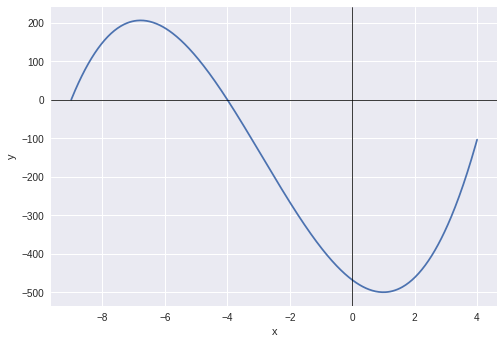

In [ ]:
X=np.linspace(-9,4,501)
plt.plot(X,F(X))

plt.axhline(y=0,lw=0.75,c='black')
plt.axvline(x=0,lw=0.75,c='black')

plt.xlabel('x')
plt.ylabel('y')

### Part 3:
From the graph it appear the function has __2 turning points.__

### Part 4:

* To find the values of $x$ which are turning points, we must find all values of $t$ such that
$$
\frac{df}{dx}=0.
$$

* First we find the derivative of $f(x)$ using __diff()__

In [ ]:
df=sym.diff(f,x)
df

9*x**2 + 52*x - 61

* Now we use __solve()__ to find all values of $x$ such that $\frac{df}{dx}=0$.

In [ ]:
TPf=sym.solve(df,x)
TPf

[-61/9, 1]

* We see there are two $x$-values where the derivative $\frac{df}{dx} = 0$. We call these values __TPf__ for __Turning Points of f__.

### Part 5:

* We note that __TPf__ is an __array__ of values. 

* We can select a specific value from this array using the index identifiers __TPf[0]__ and __TPf[1]__.

* ___Note:___ The index starts at __zero!!__

In [ ]:
x0=TPf[0]
x0

-61/9

In [ ]:
x1=TPf[1]
x1

1

* The $y$-coordinates corresponding to these stationary values are easily found using __subs().__

* The first turing point has $(x,y)$-cordinates:

In [ ]:
x0 , f.subs(x,x0)

(-61/9, 50000/243)

* These numbers can also be written in decimal form using the function __sym.N()__

In [ ]:
sym.N(x0) , sym.N(f.subs(x , x0))

(-6.77777777777778, 205.761316872428)

* The second turing point has $(x,y)$-coordinates given by

In [ ]:
sym.N(x1) , sym.N(f.subs(x , x1))

(1.00000000000000, -500.000000000000)

### The tangents at the turning points.

* The tangent at the turning point $\left(-\frac{61}{9},\frac{50000}{243}\right)$ is simply the __horizontal line__ at height $\frac{50000}{243}$.



* In other words, the equation of the tangent is:

$$y=\frac{50000}{243}.$$


* Similary, the equation of the tangent at the turning point $(1,-500)$ is simply the __horizontal line:__

$$y=-500.$$


* We can easily plot these on the original graph as follows:

Text(0, 0.5, 'y')

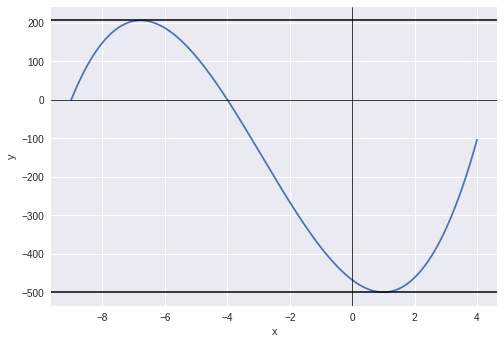

In [ ]:
X=np.linspace(-9,4,501)
plt.plot(X,F(X))

plt.axhline(y=0,lw=0.75,c='black')
plt.axvline(x=0,lw=0.75,c='black')

plt.axhline(y=F(x0), lw=1.5, color='k')# Horiztontal Tangent 1
plt.axhline(y=F(x1), lw=1.5, color='k')# Horiztontal Tangent 2

plt.xlabel('x')
plt.ylabel('y')


## Exercise 1: 

Given the function
$$
g(t)=8t^{3}-66t^{2}-81t+243
$$
answer the following:

1. Define a symbol $t$ and the function $g$ using symbolic variables.


2. __Lambdify__ this function and plot it over the interval $t \in [-4 , 10]$.


3. From this plot, estimate how many tunring points the function will have.


4. Use the __solve()__ function to determine where $\frac{dg}{dt} = 0$.


5. Use the __subs()__ function to determine the correpsonding $y$-values of the turining points.

---
---

## Classifying stationary points

* Given a function $f(t)$, with turning point $(t_0,f(t_0))$, then the turninig point is classified as follows:

    1. $(t_0,f(t_0))$ is a __max (maximum)__ if
    $$
        \frac{d^2f}{dt^2}(t_0)<0
    $$
    
    2. $(t_0,f(t_0))$ is a __min (minimum)__ if
    $$
        \frac{d^2f}{dt^2}(t_0)>0
    $$
    
    3. $(t_0,f(t_0))$ is a __point of inflection__ if
    $$
        \frac{d^2f}{dt^2}(t_0)=0.
    $$
  
---

## Example 2 - Oil refinery profit

The daily profit of an oil refinery is given by the function
$$
    p(b) = 8b − 0.02b^2,
$$

where $b$ is the number of barrels (bbl.) of oil refined. 

1. Plot the profit, and interpret the graph.

2. Use __diff()__ and __solve__ to find all possible turning points of $p(b)$.

3. Classify these turing points as __max__ or __min__ points.

4. Hence find the __maximum daily profit__ of the oil refinery.

### Part 1:

* We create a symbol for $b$, and then define the function $p(b)$.

In [ ]:
b=sym.Symbol('b')
p = 8*b - 0.02*b**2
p

-0.02*b**2 + 8*b

* We __lambdify__ this function so it is compatible with __numpy__

In [ ]:
P = sym.lambdify(b,p,'numpy')



* We can now plot the profit as a function of $b$.


* Since $b$ is the number of barrels refined, it does not make much sense to let $b$ be negative, so we plot the function over the interval $0< b< 500$.

Text(0, 0.5, 'Profit')

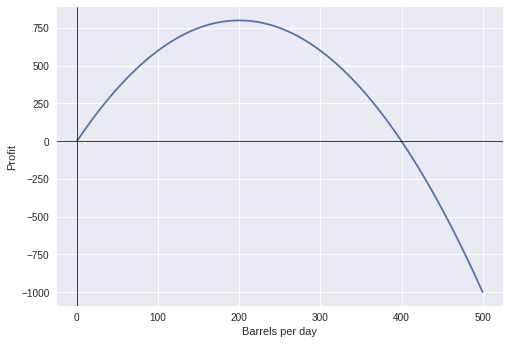

In [ ]:
B=np.linspace(0,500,1001)
plt.plot(B,P(B))

plt.axhline(y=0,lw=0.75,c='black')
plt.axvline(x=0,lw=0.75,c='black')

plt.xlabel('Barrels per day')
plt.ylabel('Profit')


* From the graph we see that the __maximim daily profit__ is achieved at about $200$ bbl. per day. 


* If the refinery refines more than 400 bbl. per day the refinery starts to loose money (i.e. profits become negative).

### Part 2:

* Differentiating using __diff()__, we have

In [ ]:
dp=sym.diff(p,b)
dp

8 - 0.04*b

* Solving for $\frac{dp}{db}=0$ we have

In [ ]:
TPp=sym.solve(dp,b)
TPp

[200.000000000000]

* There is only one turning point at $b=200$.

* We extract this from the array as follows:

In [ ]:
b0 = TPp[0]
b0

200.000000000000

### Part 3

* We find the __second derivative__ by differentiating twice:

In [ ]:
d2p=sym.diff(p,(b,2))
d2p

-0.0400000000000000

* We evaluate the second derivative __ddp__ at the stationary points __b0__, to see whether it is a max or a min

In [ ]:
d2p.subs(b,b0)

-0.0400000000000000

* Mathematically, this means


$$
\frac{d^2p}{db^2}(200.00)=-0.04<0.
$$


* Hence the turning point __b0=200.00__ is a __maximum__.

### Part 4

* The __maximum profits__ are found by substiuting this turing point into the __original function__:

In [ ]:
p_max=p.subs(b,b0)
p_max

800.000000000000

---

## Exercise 2

Consider the function 
$$
    f(x) = x(4-x)
$$

1. Plot the function $f(x)$ for $x\in[-1,5]$ and from the graph estimate how many turning points the function will have.

2. Use __diff()__ and __solve__ to find all possible turning points of $f(x)$.

3. Classify these turing points as __max__ or __min__ points.

4. Hence find the __maximum__ and __minimum__ values of the function.

## Exercise 3

Consider the function 
$$
    g(t) = t^2(8-t^2)
$$

1. Plot the function $g(t)$ for $t\in[-3,3]$ and from the graph estimate how many turning points the funciton will have.

2. Use __diff()__ and __solve__ to find all possible turning points of $g(t)$.

3. Classify these turing points a __max__ or __min__ points.

4. Hence find the __maximum__ and __minimum__ values of the function.

## Exercise 4

The acceleration of a machine is given by
$$
    a(r) = \frac{10r+1}{5r^2+3150}
$$

where $r$ is the gear ratio. 

1. Plot the function $a(r)$ for $r\in[-30,30]$ and estimate the number of turning points.

2. Use __diff()__ and __solve__ to find all possible turning points of $a(r)$.

3. Classify these turing points as __max__ or __min__ points.

4. Hence find the __maximum__ and __minimum__ accelerations of the machine.

## Exercise 5
The displacement (position) of a moving object at time $t$ is given by
$$
    D(t) = (1-t^2)e^{-t}
$$


1. Plot the function $D(t)$ for $t\in[-1.5,1.5]$ and estimate the number of turning points.

2. Use __diff()__ and __solve__ to find all possible turning points of $D(t)$.

3. Classify these turing points as __max__ or __min__ points.

4. Hence find the __maximum__ and __minimum__ displacement of the particle.


__NOTE:__ We may write the function $e^{-t}$ in python as __sym.exp(-t)__